In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

login = os.getlogin()
# Original paths assume checkout in some special location
figures_dir = f'/home/{login}/Git/tcr/notebooks/notebooks.classification/figures'
dataset_dir = f'/home/{login}/Git/tcr/data/' # containing e.g. alpha-beta-splits/alpha-beta.csv

# To run in github checkout of vibtcr, after `unzip data.zip` ...
figures_dir = os.path.join('.', 'figures')
dataset_dir = os.path.join('..', '..', 'data')


In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def plot_hist(df, col, name):
    """ Plot two histograms over the same possible values.
    Sort by count according to the df_1 (positive samples).
    If certain values are only present in df_2, then sort them too,
    so that they appear sorted before the df_1 histogram begins.
    """
    df_1 = df[df["label"] == 1]
    df_2 = df[df["label"] == 0]

    unique_seqs = set(df_1[col].unique()).union(set(df_2[col].unique()))
    
    seqs_count_map_1 = {seq: 0 for seq in unique_seqs}
    tmp = df_1[col].value_counts().to_dict()
    for i in tmp.keys():
        seqs_count_map_1[i] += tmp[i]

    seqs_count_map_1 = {k: v for k, v in sorted(seqs_count_map_1.items(), key=lambda item: item[1])}
    seq_id_map = {seq: i for i, seq in enumerate(seqs_count_map_1.keys())}
    seqs_count_map_1 = {seq_id_map[seq]: count for seq, count in seqs_count_map_1.items()}
    
    seqs_count_map_2 = {seq: 0 for seq in unique_seqs}
    tmp = df_2[col].value_counts().to_dict()
    for i in tmp.keys():
        seqs_count_map_2[i] += tmp[i]

    seqs_count_map_2 = {k: v for k, v in sorted(seqs_count_map_2.items(), key=lambda item: item[1])}
    seqs_count_map_2 = {seq_id_map[seq]: count for seq, count in seqs_count_map_2.items()}
    
    for i in seqs_count_map_1.keys():
        frist_non_zero_index_of_1 = i
        first_non_zero_1 = seqs_count_map_1[i]
        if first_non_zero_1 > 0:
            break
    
    if frist_non_zero_index_of_1 > 0:
        sequences_in_2_only = []
        for i in range(frist_non_zero_index_of_1):
            sequences_in_2_only.append(seqs_count_map_2[i])
            sorted_sequences_in_2_only = sorted(sequences_in_2_only)

        for i, s in enumerate(sorted_sequences_in_2_only):
            seqs_count_map_2[i] = s
    
    print("Plotting...")
    fig, ax = plt.subplots()
    plt.bar(seqs_count_map_2.keys(), seqs_count_map_2.values(), label="Non-binding", color="darkorange", alpha=0.5,width=1.0)
    plt.bar(seqs_count_map_1.keys(), seqs_count_map_1.values(), label="Binding", color="indigo",alpha=0.5,width=1.0)

    ax.grid(axis='y')
    plt.ylabel ('Count')
    plt.xlabel (f'{name} (unique sequences)')
    plt.legend(loc="upper left")
    plt.yscale('log') 
    plt.title(f'{name} distribution')
    ax.set_axisbelow(True)
    return fig, ax

# Pep + CDR3b + CDR3a

In [4]:
dataset_path = os.path.join(dataset_dir,"alpha-beta-splits","alpha-beta.csv")
ds = pd.read_csv(dataset_path)
ds = ds.rename(columns={'tcra':'cdr3.alpha', 'tcrb': 'cdr3.beta', 'peptide': 'antigen.epitope', 'sign':'label'})

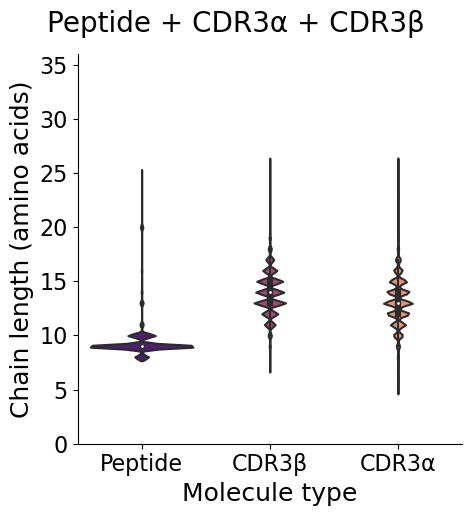

In [5]:
df_pep_b_a = ds[["antigen.epitope", "cdr3.beta", "cdr3.alpha", "label"]].dropna().copy()

sns.set_palette('magma', 3)
sequences = df_pep_b_a["antigen.epitope"].to_list() + df_pep_b_a["cdr3.beta"].to_list() + df_pep_b_a["cdr3.alpha"].to_list()
label = ['Peptide']*len(df_pep_b_a) + ['CDR3β']*len(df_pep_b_a) + ['CDR3α']*len(df_pep_b_a)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("Peptide + CDR3α + CDR3β", y=1.04)
plt.ylim([0, 36])
# plt.savefig(figures_dir + "alpha-beta-set.violins.pep+cdr3b+cdr3a.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"alpha-beta-set.violins.pep+cdr3b+cdr3a.png"), format='png', dpi=300, bbox_inches='tight')

Plotting...


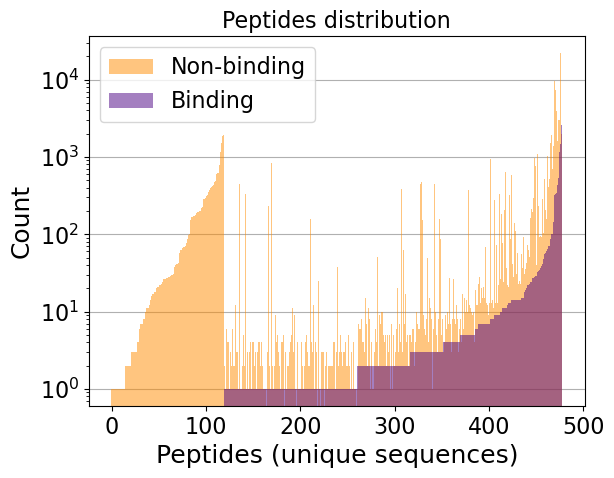

In [6]:
fig, ax = plot_hist(df_pep_b_a, "antigen.epitope", "Peptides")
# plt.savefig(figures_dir + "alpha-beta-set.hist.pep+cdr3b+cdr3a.pep.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"alpha-beta-set.hist.pep+cdr3b+cdr3a.pep.png"), format='png', dpi=300, bbox_inches='tight')

Plotting...


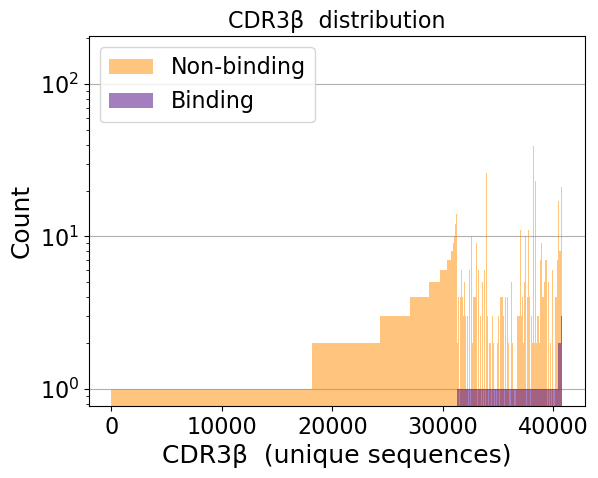

In [7]:
fig, ax = plot_hist(df_pep_b_a, "cdr3.beta", "CDR3β ")
# plt.savefig(figures_dir + "alpha-beta-set.hist.pep+cdr3b+cdr3a.cdr3b.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"alpha-beta-set.hist.pep+cdr3b+cdr3a.cdr3b.png"), format='png', dpi=300, bbox_inches='tight')

Plotting...


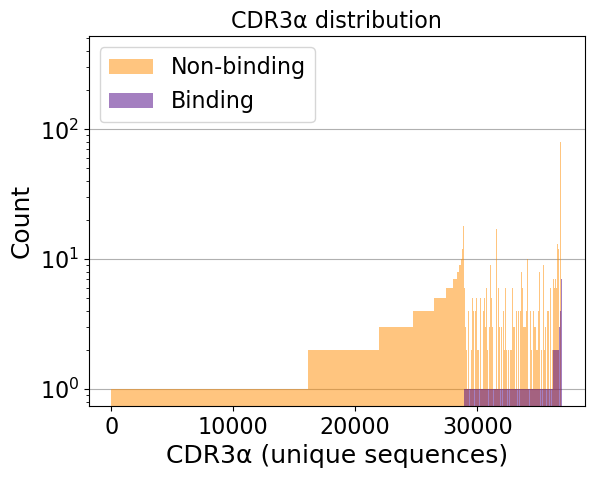

In [8]:
fig, ax = plot_hist(df_pep_b_a, "cdr3.alpha", "CDR3α")
# plt.savefig(figures_dir + "alpha-beta-set.hist.pep+cdr3b+cdr3a.cdr3a.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"alpha-beta-set.hist.pep+cdr3b+cdr3a.cdr3a.png"), format='png', dpi=300, bbox_inches='tight')

# Pep + CDR3b

In [9]:
#dataset_path = f'/home/{login}/Git/tcr/data/alpha-beta-splits/beta.csv'
dataset_path = os.path.join(dataset_dir,"alpha-beta-splits/beta.csv")
ds = pd.read_csv(dataset_path)
ds = ds.rename(columns={ 'tcrb': 'cdr3.beta', 'peptide': 'antigen.epitope', 'sign':'label'})

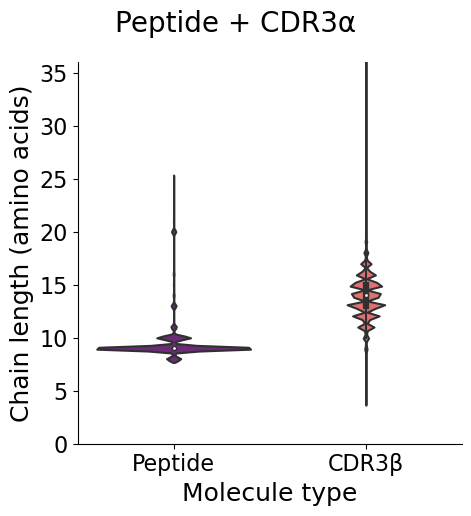

In [10]:
df_pep_b = ds[["antigen.epitope", "cdr3.beta", "label"]].dropna().copy()

sns.set_palette('magma', 2)
sequences = df_pep_b["antigen.epitope"].to_list() + df_pep_b["cdr3.beta"].to_list()
label = ['Peptide']*len(df_pep_b) + ['CDR3β']*len(df_pep_b)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("Peptide + CDR3α", y=1.04)
plt.ylim([0, 36])
# plt.savefig(figures_dir + "beta-set.violins.pep+cdr3b+cdr3a.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"beta-set.violins.pep+cdr3b+cdr3a.png"), format='png', dpi=300, bbox_inches='tight')

Plotting...


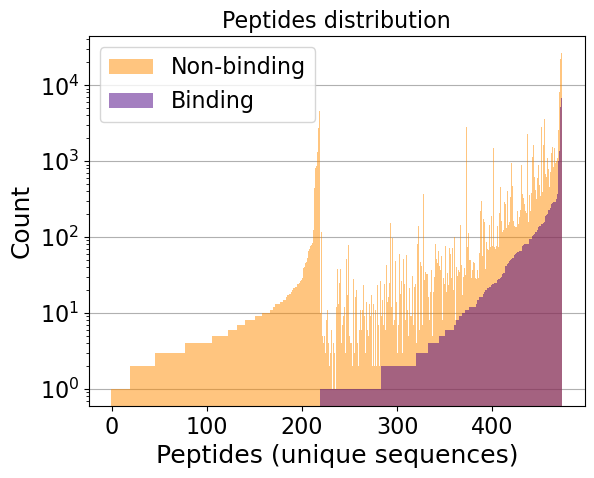

In [11]:
fig, ax = plot_hist(df_pep_b, "antigen.epitope", "Peptides")
# plt.savefig(figures_dir + "beta-set.hist.pep+cdr3b+cdr3a.pep.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"beta-set.hist.pep+cdr3b+cdr3a.pep.png"), format='png', dpi=300, bbox_inches='tight')

Plotting...


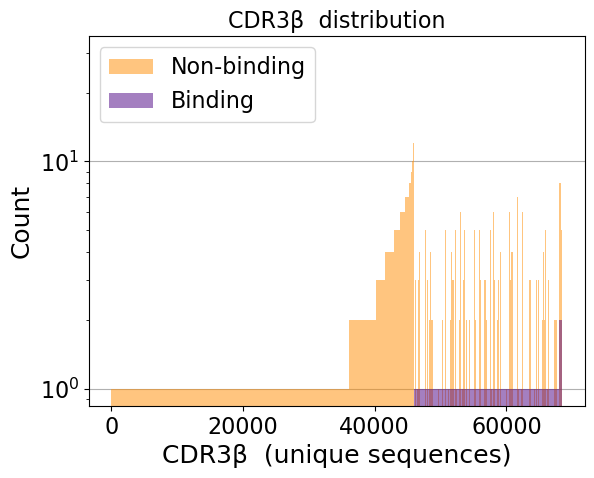

In [12]:
fig, ax = plot_hist(df_pep_b, "cdr3.beta", "CDR3β ")
# plt.savefig(figures_dir + "beta-set.hist.pep+cdr3b+cdr3a.cdr3b.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(figures_dir,"beta-set.hist.pep+cdr3b+cdr3a.cdr3b.png"), format='png', dpi=300, bbox_inches='tight')